# Trigger Matching

**Goal:** Todd's shown some really promising results for the 3b + 1 loose, but we sort of have this open Q of whether or not we can use PC quantile information on the analysis b/c the trigger SFs are only derived conditional on a fixed offline WP.

Michael's idea was to require the online b-tagged jets to have an offline tag at the 77% WP, so here I'm just trying to evaluate how many jets we lose with this requirement.

The MNTs from Marco (w/ the JUN tag) don't have the `resolvedJets_isOnlineBTagged.sf{1b,2b1j,2bht,2b2j}` branches yet, so I'm going to need to make my own MNTs for this study rn.
 
**Update:** master now should be working w/ PC, so I'm going to change to *master* for this little study + setup haha.


Command Arely ran: `submit.sh --mc --minimal --nonresonant --systematics resolved --mode grid ../datasets/HH_FullTop.txt`

It seems like the current master (w/ the MAR21 NR tag) don't have the `resolvedJets_DL1r_SF_Continuous` branch getting filled with entries, so I'm just going to work from Max's `restore_continuous` branch for now.

Command to run (locally):

`submit.sh --mc --nonresonant --mode local ../datasets/sm_mc16d.txt  > output.txt`


In [275]:
import pandas as pd
import numpy as np
from itertools import product
from glob import glob 

import matplotlib.pyplot as plt

import uproot
from uproot_methods.classes.TLorentzVector import TLorentzVectorArray

import os
os.sys.path += ['../RRevolution/code/',"../PAG-opt/","../PyATLASstyle/"]
from analysis import processDf
from utils import fileDirSLAC as fileDir, mcToYr

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [276]:
#key = f'{physicsSample}_{mc}-{prodTag}'

filename = '/gpfs/slac/atlas/fs1/d/nhartman/hh4b/XhhCommon/run/XhhCommon-sm_mc16d-full-21.2.123_priv_mar1821/data-MiniNTuple/mc16_13TeV.600043.PhH7EG_PDF4LHC15_HHbbbb_cHHH01d0.deriv.DAOD_EXOT8.e7954_s3126_r10201_p4089.root'
#glob(fileDir[key]+'*.root')[0]
print(filename)

treename = "XhhMiniNtuple" 

with uproot.open(filename) as f:
    tree = f[treename]

/gpfs/slac/atlas/fs1/d/nhartman/hh4b/XhhCommon/run/XhhCommon-sm_mc16d-full-21.2.123_priv_mar1821/data-MiniNTuple/mc16_13TeV.600043.PhH7EG_PDF4LHC15_HHbbbb_cHHH01d0.deriv.DAOD_EXOT8.e7954_s3126_r10201_p4089.root


In [277]:
len(tree)

72738

In [278]:
df = processDf(filename, treename, nJetsMax=4, year=mcToYr[mc], pT_min=40, mc=True, truth=False,
               hashFile='../RRevolution/code/hashMap.json',bjetTrigSFs=True)


Opening /gpfs/slac/atlas/fs1/d/nhartman/hh4b/XhhCommon/run/XhhCommon-sm_mc16d-full-21.2.123_priv_mar1821/data-MiniNTuple/mc16_13TeV.600043.PhH7EG_PDF4LHC15_HHbbbb_cHHH01d0.deriv.DAOD_EXOT8.e7954_s3126_r10201_p4089.root
Loading in the event df
Running on mc
Loading in the jet array


/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy.array(value, copy=False)


Sorting selected jets by Quantile_DL1r_Continuous
  Jet sfs for evts with 4 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 6 resolved jets
  Jet sfs for evts with 5 selected jets out of 6 resolved jets
  Jet sfs for evts with 6 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 selected jets out of 7 resolved jets
  Jet sfs for evts with 5 selected jets out of 7 resolved jets
  Jet sfs for evts with 6 selected jets out of 7 resolved jets
  Jet sfs for evts with 7 selected jets out of 7 resolved jets
  Jet sfs for evts with 4 selected jets out of 8 resolved jets
  Jet sfs for evts with 5 selected jets out of 8 resolved jets
  Jet sfs for evts with 6 selected jets out of 8 resolved jets
  Jet sfs for evts with 7 selected jets out of 8 resolved jets
  Jet sfs for evts with 8 selected jets out of 8 resolved jets
  Jet

In [279]:
len(df)

72738

In [280]:
for c in df.columns:
    print(c)

eventNumber
nresolvedJets
weight_pileup
mcEventWeight
rand_run_nr
j0_pt
j0_eta
j0_phi
j0_E
j0_btag
j0_Db
j0_jvc
j0_sf_1b
j0_sf_2b1j
j0_sf_2bHT
j0_sf_2b2j
j1_pt
j1_eta
j1_phi
j1_E
j1_btag
j1_Db
j1_jvc
j1_sf_1b
j1_sf_2b1j
j1_sf_2bHT
j1_sf_2b2j
j2_pt
j2_eta
j2_phi
j2_E
j2_btag
j2_Db
j2_jvc
j2_sf_1b
j2_sf_2b1j
j2_sf_2bHT
j2_sf_2b2j
j3_pt
j3_eta
j3_phi
j3_E
j3_btag
j3_Db
j3_jvc
j3_sf_1b
j3_sf_2b1j
j3_sf_2bHT
j3_sf_2b2j
njets
mc_sf
X_wt
X_wt_old
HT_all
lead_pt
lead_tag
ntag
third_pt
HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25
HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21
HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30
HLT_j225_gsc300_bmv2c1070_split
trigger
run_number


In [281]:
df['minQ'] = np.min(df[[f'j{i}_Db' for i in range(4)]],axis=1)

In [282]:
tDict

{'1b': 'HLT_j225_gsc300_bmv2c1070_split',
 '2b1j': 'HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30',
 '2bHT': 'HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21',
 '2b2j': 'HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25'}

In [283]:
trig_cols = [f'j{i}_sf_{ti}' for i,ti in product(range(4),['2b1j','2b2j'])]

mask = (df.trigger) & (df.njets>=4) & (df.ntag == 3) & (df.minQ==2)

df.loc[mask,trig_cols]

j0_sf_2b1j  j0_sf_2b2j  j1_sf_2b1j  j1_sf_2b2j  j2_sf_2b1j  j2_sf_2b2j  \
entry                                                                           
69            0.0         1.0         0.0         0.0         0.0         1.0   
70            0.0         1.0         0.0         0.0         0.0         1.0   
88            1.0         0.0         1.0         0.0        -1.0         0.0   
114           1.0         0.0         1.0         0.0         1.0         0.0   
119           0.0         1.0         0.0         1.0         0.0         0.0   
...           ...         ...         ...         ...         ...         ...   
72514         1.0         0.0         1.0         0.0        -1.0         0.0   
72525         1.0         1.0         1.0         1.0         1.0         0.0   
72576         1.0         1.0         1.0         1.0         1.0         1.0   
72622         1.0         1.0         1.0         1.0        -1.0         0.0   
72665         1.0         1.0         1.0         1.0         1.0         1.0   

       j3_sf_2b1j  j3_sf_2b2j  
entry                          
69            0.0         0.0  
70            0.0         0.0  
88            0.0         0.0  
114          -1.0         0.0  
119           0.0         0.0  
...           ...         ...  
72514         1.0         0.0  
72525        -1.0         0.0  
72576         1.0         0.0  
72622         1.0         0.0  
72665         1.0         0.0  

[2510 rows x 8 columns]

In [284]:
from triggerBuckets import trigger_lut
tDict = trigger_lut(mcToYr[mc])

In [285]:
tDict

{'1b': 'HLT_j225_gsc300_bmv2c1070_split',
 '2b1j': 'HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30',
 '2bHT': 'HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21',
 '2b2j': 'HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25'}

In [286]:
df['nr_bucket'] = 0

b1_mask = (df.lead_pt>170) & (df.third_pt>70)

df.loc[b1_mask & df[tDict['2b1j']],'nr_bucket'] = 1
df.loc[~b1_mask & df[tDict['2b2j']],'nr_bucket'] = 2

**Step 1:** Let's loop through *each* of the triggers and check whether the b-tagged jets are b-tagged

In [287]:
sf_2b1j = [f'j{i}_sf_2b1j' for i in range(4)]
sf_2b2j = [f'j{i}_sf_2b2j' for i in range(4)]

In [288]:
df.loc[mask & (df.nr_bucket==2),sf_2b1j]

j0_sf_2b1j  j1_sf_2b1j  j2_sf_2b1j  j3_sf_2b1j
entry                                                
69            0.0         0.0         0.0         0.0
70            0.0         0.0         0.0         0.0
119           0.0         0.0         0.0         0.0
123           0.0         0.0         0.0         0.0
125           0.0         0.0         0.0         0.0
...           ...         ...         ...         ...
72342         0.0         0.0         0.0         0.0
72391         0.0         0.0         0.0         0.0
72409         0.0         0.0         0.0         0.0
72525         1.0         1.0         1.0        -1.0
72576         1.0         1.0         1.0         1.0

[1229 rows x 4 columns]

In [289]:
sf_2b1j

['j0_sf_2b1j', 'j1_sf_2b1j', 'j2_sf_2b1j', 'j3_sf_2b1j']

In [290]:
on_2b1j = np.sum((df.loc[mask & (df.nr_bucket==1),sf_2b1j[:3]]==1).values,axis=1)
on_2b1j

array([3, 3, 1, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 1, 3, 3, 3, 3,
       3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3,
       3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 1, 3, 3, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3,

In [291]:
len(on_2b1j)

961

In [292]:
w_2b1j = df.loc[mask & (df.nr_bucket==1),'mc_sf'].values

In [293]:
np.sum((on_2b1j>=2) * w_2b1j) / np.sum(w_2b1j)

0.9728756516368899

In [294]:
on_2b1j

array([3, 3, 1, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 1, 3, 3, 3, 3,
       3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3,
       3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 1, 3, 3, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3,

And now for 2b2j!!

In [295]:
on_2b2j = np.sum((df.loc[mask & (df.nr_bucket==2),sf_2b2j[:3]]==1).values,axis=1)
w_2b2j = df.loc[mask & (df.nr_bucket==2),'mc_sf'].values


np.sum((on_2b2j>=2) * w_2b2j) / np.sum(w_2b2j)


0.9855851852836042

In [296]:
on_2b2j

array([2, 2, 2, ..., 2, 2, 3])

Cool!! So, now let's make a few plots.

In [297]:
figDir = 'figures/SMNR_mc16d_priv/'

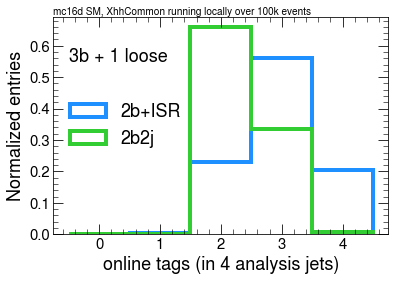

In [302]:
for bi, sfs,c,l in zip([1,2],[sf_2b1j,sf_2b2j],['dodgerblue','limegreen'],
                       ['2b+ISR','2b2j']):

    mi = mask & (df.nr_bucket==bi)
    
    onTags = np.sum((df.loc[mi,sfs]==1).values,axis=1)
    w = df.loc[mi,'mc_sf'].values
    
    plt.hist(onTags, 5, (-0.5,4.5), histtype='step',lw=4,label=l,color=c,weights=w,density=True)
    
plt.xlabel('online tags (in 4 analysis jets)',fontsize=18)
plt.ylabel('Normalized entries',fontsize=18)
plt.legend(loc='center left',fontsize=18)

plt.text(-0.5,.55,"3b + 1 loose",fontsize=18)

ax = plt.gca()
plt.text(0,1,'mc16d SM, XhhCommon running locally over 100k events',
         ha='left',va='bottom',transform=ax.transAxes,fontsize=10)

plt.savefig(f'{figDir}/onlineTags.pdf',bbox_inches='tight')

Then *also* make an $m_{hh}$ plot with the # of events kept and lost

In [303]:
from analysis import allPairs, min_dR1

In [304]:
allPairs(df,'pt')

min_dR1(df)


pair 0: (0, 1) (2, 3)


/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/uproot_methods/classes/TLorentzVector.py:181: RuntimeWarning: invalid value encountered in true_divide
  return self._trymemo("eta", lambda self: self.awkward.numpy.arcsinh(self.z / self.awkward.numpy.sqrt(self.x**2 + self.y**2)))


pair 1: (0, 2) (1, 3)
pair 2: (0, 3) (1, 2)


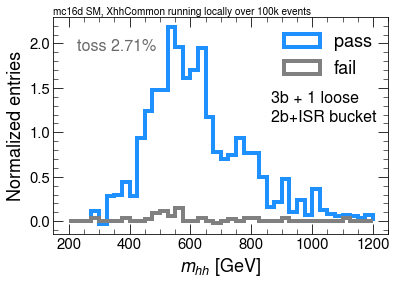

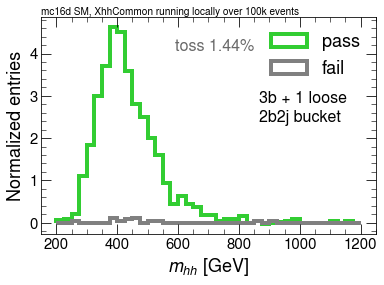

In [306]:
for bi, sfs,c,l,xloc in zip([1,2],[sf_2b1j,sf_2b2j],['dodgerblue','limegreen'],
                            ['2b+ISR','2b2j'],[.07,.4]):

    mi = mask & (df.nr_bucket==bi)
    hlt_offTag = np.sum((df.loc[mi,sfs[:3]]==1).values,axis=1)
    w = df.loc[mi,'mc_sf'].values

    plt.figure()
    for cut, ci, li in zip([hlt_offTag>=2,hlt_offTag<2],[c,'grey'],['pass','fail']):
        plt.hist(df.loc[mi,'m_hh'].values[cut], 40,(200,1200), 
                 histtype='step',lw=4,label=li,color=ci,weights=w[cut])
    
    plt.xlabel('$m_{hh}$ [GeV]',fontsize=18)
    plt.ylabel('Normalized entries',fontsize=18)
    plt.legend(loc='upper right',fontsize=18)

    ax = plt.gca()
    plt.text(.65,.66,f"3b + 1 loose\n{l} bucket",ha='left',va='top',
             transform=ax.transAxes,fontsize=16)    
    plt.text(0,1,'mc16d SM, XhhCommon running locally over 100k events',
             ha='left',va='bottom',transform=ax.transAxes,fontsize=10)
    
    toss = 100 * np.sum((hlt_offTag<2) * w) / np.sum(w)
    tossText = f'toss {toss:.2f}%'
    plt.text(xloc,.9,tossText,ha='left',va='top',transform=ax.transAxes,
             fontsize=16,color='dimgrey') 
    
    ti = l.replace('+ISR','1j')
    plt.savefig(f'{figDir}/m_hh_3b1l_pass_{ti}.pdf',bbox_inches='tight')

Ok, *potentially* I might want to propagate this a bit further to the SR, but I def don't have the stats for this rn lol!!